In [38]:

<br><br>

***

<br><br>


<center><font size="7" color="purple">Cookbook Examples</font></center>

<br><br>

***


<br><br><br><br>

<pre>
    1)  pydataset
    2)  Parameters. Padding
    3)  yscale
    4)  Yahoo Finance
    5)  Path Effects
    6)  Controlling Fonts
    7)  Integral Area Under Curve
    8)  Cartopy
</pre>

<br><br><br><br>

More Useful Stuff from the packt cookbook.

see C:\Users\arono\source\python\Plots\cookbook\9781789135718_Code
see https://github.com/PacktPublishing/Matplotlib-3.0-Cookbook
    

SyntaxError: invalid syntax (<ipython-input-38-6c39be79759d>, line 1)

In [ ]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import datetime as dt 

pydataset

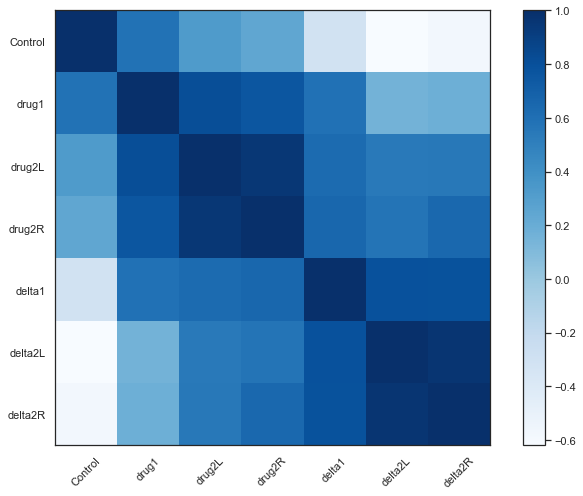

In [39]:
from pydataset import data


cushny_df= data('cushny')

import matplotlib.pyplot as plt
import pandas as pd

# cushny_df has 7 independent quantitative variables
corr = cushny_df.corr()


plt.figure(figsize=(12,8))
plt.imshow(corr, cmap='Blues')
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns, rotation=45)
plt.yticks(range(len(corr)),corr.columns)
plt.show()

Tweak the various fonts and the layout, note the tight_layout padding 

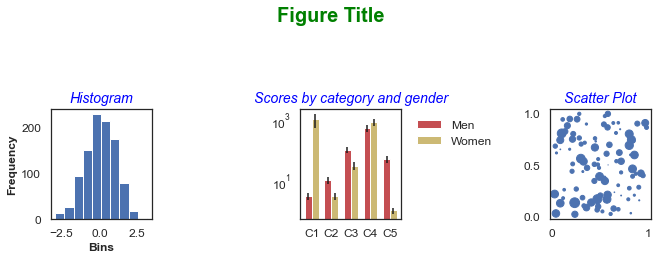

In [40]:
np.random.seed(1968)

plt.rcParams['figure.titlesize'] = 15
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

fig, ax = plt.subplots(1, 3, figsize=(10,4))

ax[0].hist(np.random.randn(1000))
ax[0].set(xlabel='Bins', ylabel='Frequency')
atitle = ax[0].set_title('Histogram', fontstyle='italic', fontsize=14)

      # atitle is a matplotlib.text.Text object
    
plt.setp(atitle,color='blue')



menMue = [3, 10, 100, 500, 50]
menSigma = [0.75, 2.5, 25, 125, 12.5]
index = np.arange(len(menMue))                # the x locations for the groups
width = 0.35                                  # the width of the bars
p1 = ax[1].bar(index, menMue, width, color='r', bottom=0, yerr=menSigma)

womenMue = [1000, 3, 30, 800, 1]
womenSigma = [500, 0.75, 8, 200, 0.25]
p2 = ax[1].bar(index + width, womenMue, width, color='y', bottom=0, yerr=womenSigma)
atitle = ax[1].set_title('Scores by category and gender', fontstyle='italic', fontsize=14)
plt.setp(atitle,color='blue')

ax[1].set(xticks=(index + width / 2), xticklabels=('C1', 'C2', 'C3', 'C4', 'C5'),  yscale='log')

ax[1].legend((p1[0], p2[0]), ('Men', 'Women'), bbox_to_anchor=(1.05,1))

ax[2].scatter(np.random.rand(100),np.random.rand(100),  s=100*np.random.rand(100)*np.random.rand(100))

atitle = ax[2].set_title('Scatter Plot', fontstyle='italic', fontsize=14)
plt.setp(atitle,color='blue')

ftitle= plt.suptitle('Figure Title', fontname='arial', fontsize=20, fontweight='bold')
plt.setp(ftitle, color='green')

plt.tight_layout(pad=3,w_pad=2)         # pad=3 adds space between figure title and axes, (it makes the axes shorter)
                                                # it does not make the figure taller

plt.show()

Use of xlim and ylim

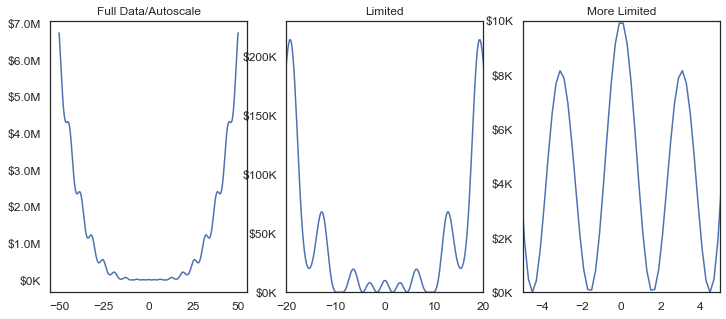

In [41]:
from matplotlib.ticker import FuncFormatter

def Num_Format(x, pos):
    """ 'x' is the number and 'pos' is tick position"""
    if x >= 1e6:
        string = '${:1.1f}M'.format(x*1e-6)
    else:
        string = '${:1.0f}K'.format(x*1e-3)
    return string

formatter = FuncFormatter(Num_Format)

x = np.linspace(-50,50,500)
y = x**2 + np.cos(x)*100



# x is an array of 500 numbers, appx .21 apart from -50 to 50
# y is x squared + the cosine * 100 and is very volatile




fig, axs = plt.subplots(1,3, figsize=(12,5))
axs[0].yaxis.set_major_formatter(formatter)
axs[0].plot(x, y**2)
axs[0].set_title('Full Data/Autoscale')

axs[1].plot(x, y**2)
axs[1].set(xlim=(-20,20),  ylim=(0,230000), title='Limited')
axs[1].yaxis.set_major_formatter(formatter)

axs[2].plot(x, y**2)
axs[2].set(xlim=(-5,5), ylim=(0,10000), title='More Limited')
axs[2].yaxis.set_major_formatter(formatter)

plt.show()


Specify the y axis to be powers of 10 with ax.set_yscale('log')

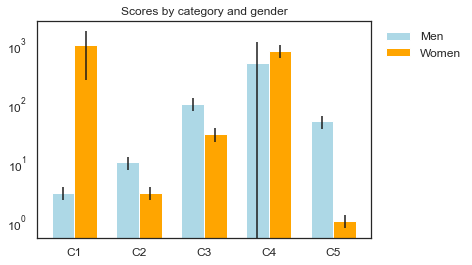

In [42]:
menMue = [3, 10, 100, 500, 50]
menSigma = [0.75, 2.5, 25, 625, 12.5]

fig, ax = plt.subplots()
ind = np.arange(len(menMue))      # x locations for the groups
width = 0.35                      # width of the bars
p1 = ax.bar(ind, menMue, width, color='lightblue', bottom=0, yerr=menSigma)

womenMue = [1000, 3, 30, 800, 1]
womenSigma = [750, 0.75, 8, 200, 0.25]
p2 = ax.bar(ind + width, womenMue, width, color='orange', bottom=0, yerr=womenSigma)

ax.set_title('Scores by category and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('C1', 'C2', 'C3', 'C4', 'C5'))




# ax.set_yscale('log') doesnt change the graph, just the y ticks
#     change from 200,400 ... 1200  to 10^2  10^3
#  ax.set_yscale('logit') does something weird to it

ax.set_yscale('log')

 # the legend would be on the inside
 # bbox_to_anchor positions it such that the top right corner lays at the x,y point
 #         (-1,1) far away on the left (y=1 means its aligned neatly on the top)
 #         (0,1)  fully outside, neatly on the top-left
 #         (1.3,1)  positions neatly on the top right
 #
ax.legend((p1[1], p2[1]), ('Men', 'Women'), bbox_to_anchor=(1.3,1))

 
plt.show()

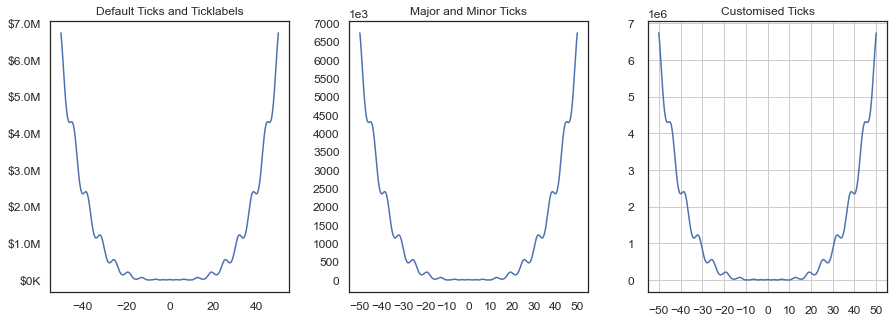

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.ticker import FuncFormatter

def Num_Format(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        string = '${:1.1f}M'.format(x*1e-6)
    else:
        string = '${:1.0f}K'.format(x*1e-3)
    return string

def plot_graph(axes, axis, major_step_size, minor_step_size):
    majorLocator = MultipleLocator(major_step_size)
    minorLocator = MultipleLocator(minor_step_size)
    if axis == 'x':
        axes.xaxis.set_major_locator(majorLocator)
        axes.xaxis.set_minor_locator(minorLocator)
    else:
        axes.yaxis.set_major_locator(majorLocator)
        axes.yaxis.set_minor_locator(minorLocator)
    #axes.yaxis.set_major_formatter(formatter)      # Commented for 3.0

formatter = FuncFormatter(Num_Format)

x = np.linspace(-50,50,500)
y = x**2 + np.cos(x)*100

fig, axs = plt.subplots(1,3, figsize=(15,5))
fig.subplots_adjust(wspace=0.25)     # Changed from 0.5 to 0.25, to avoid overlaps in xtics

axs[0].plot(x, y**2)
axs[0].set_title('Default Ticks and Ticklabels')
axs[0].yaxis.set_major_formatter(formatter)

axs[1].plot(x, y**2)
plot_graph(axs[1], 'y', 500000, 250000)
plot_graph(axs[1], 'x', 10, 2)
axs[1].set_title('Major and Minor Ticks')
axs[1].ticklabel_format(style='sci', scilimits=(3, 3), axis='y')  # added for 3.0

axs[2].plot(x, y**2)
plot_graph(axs[2], 'x', 10, 2)

minorLocator = AutoMinorLocator()
axs[2].xaxis.set_minor_locator(minorLocator)
axs[2].ticklabel_format(style='sci', scilimits=(6, 6), axis='y')   # added for 3.0
axs[2].tick_params(which='major', length=10, color='g')
axs[2].tick_params(which='minor', length=4, color='r')
axs[2].tick_params(which='both', width=2)
axs[2].set_title('Customised Ticks')
axs[2].grid(True)

plt.show();

Your axis' can be moved elsewhere. The word for the axis location is *spine*

You can relocate the axis with ax.spine and relocate the ticks with set_ticks_position


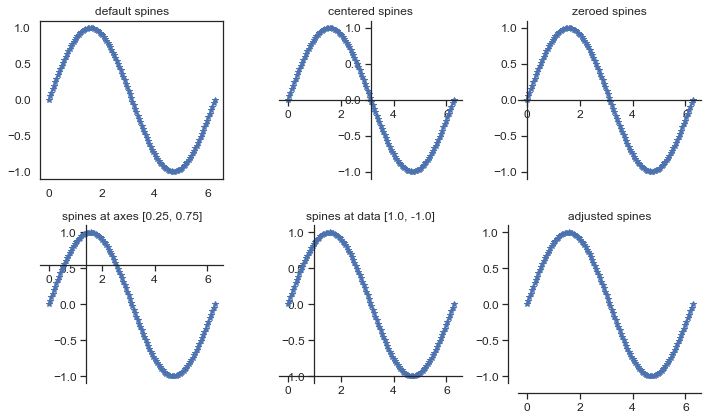

In [44]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi, 128)
y = np.sin(theta)

fig = plt.figure(figsize=(10,6))  # changed (8,6) to (10,6) for 3.0 to match output figure

ax1 = fig.add_subplot(2, 3, 1)
ax1.plot(theta, np.sin(theta), 'b-*')
ax1.set_title('default spines')

def plot_graph(axs, title, lposition, bposition):
    ax = fig.add_subplot(axs)
    ax.plot(theta, y, 'b-*')
    ax.set_title(title)
    ax.spines['left'].set_position(lposition)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position(bposition)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
plot_graph(232, 'centered spines', 'center', 'center') 
plot_graph(233, 'zeroed spines', 'zero', 'zero')
plot_graph(234, 'spines at axes [0.25, 0.75]', ('axes', 0.25), ('axes', 0.75))
plot_graph(235, 'spines at data [1.0, -1.0]', ('data', 1.0), ('data', -1.0))
plot_graph(236, 'adjusted spines', ('outward', 10), ('outward', 10))

plt.tight_layout()

plt.show();


Yahoo Finance


[*********************100%***********************]  1 of 1 completed


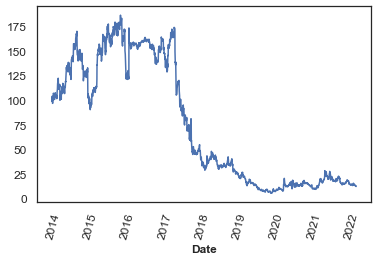

In [45]:
import yfinance as yf


data = yf.download('RAD','2013-10-01','2021-12-01')
data.Close.plot()
plt.xticks(rotation=75)     # new line added for 3.0

plt.show();

Path Effects

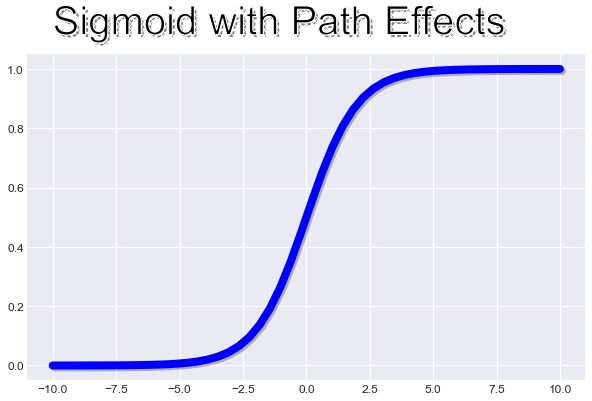

In [46]:
from matplotlib.patheffects import PathPatchEffect, SimpleLineShadow, Normal

plt.style.use('seaborn-darkgrid')

plt.subplots(figsize=(10,6))
x = np.linspace(-10, 10, 50)
y = 1.0 / (1 + np.exp(-x))

t = plt.text(-10., 1.15, 'Sigmoid with Path Effects', fontsize=40, weight=50, va='center',
             path_effects=[PathPatchEffect(offset=(3, -3), hatch='xxxx', facecolor='gray'),
                           PathPatchEffect(edgecolor='white', linewidth=1.1, facecolor='black')])

plt.plot(x, y, linewidth=8, color='blue',
         path_effects=[SimpleLineShadow(), Normal()])

plt.show();

Controlling fonts

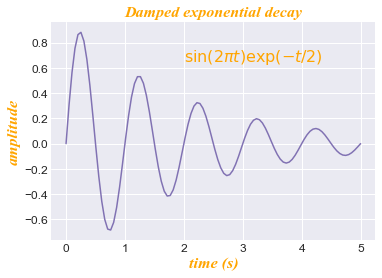

In [47]:

font = {'family': 'DejaVu Sans',
        'name': 'Times New Roman',
        'style':  'italic',
        'color':  'orange',
        'weight': 'bold',
        'size': 16
        }

t = np.linspace(0.0, 5.0, 100)
y = np.sin(2*np.pi*t) * np.exp(-t/2)

plt.plot(t, y, 'm')
plt.title('Damped exponential decay', fontdict=font)
plt.text(2, 0.65, r'$\sin(2 \pi t) \exp(-t/2)$', fontdict=font)
plt.xlabel('time (s)', fontdict=font)
plt.ylabel('amplitude', fontdict=font)

# Adjust space to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

Integral Area Under Curve

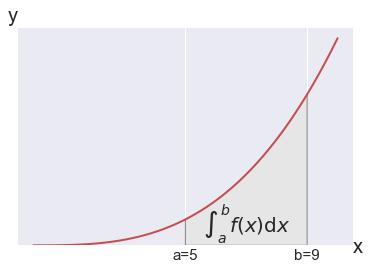

In [48]:
from matplotlib.patches import Polygon

a, b = 5, 9                    # integral limits
x = np.linspace(0, 10)
y = x ** 3                     # 3rd order Polynomial curve

fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(0)

# Plot the shaded region
intx = np.linspace(a, b)
inty = intx ** 3
verts = [(a, 0)] + list(zip(intx, inty)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 60, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.1, 'x', size=20)
plt.figtext(0.1, 0.9, 'y', size=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticks((a, b))
ax.set_xticklabels(('a=5', 'b=9'), size=15)
ax.set_yticks([])

plt.show()

Fractions, Expressions and Symbols

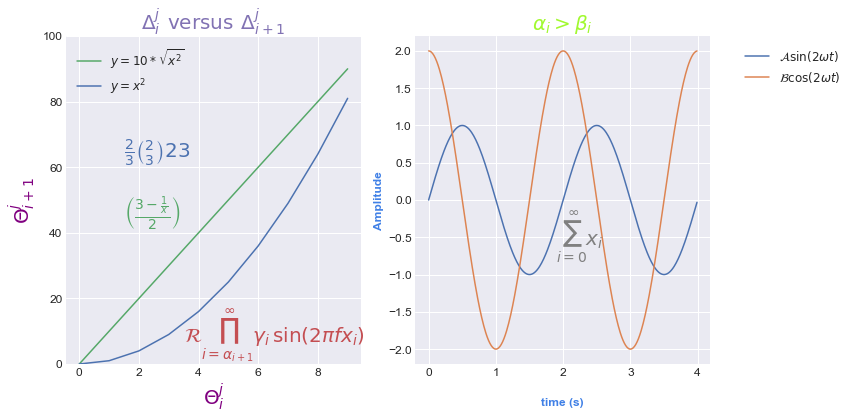

In [49]:
x = np.linspace(0, 9, 10)
y = 10*np.sqrt(x**2)
y1 = x ** 2

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(x, y, 'g', label=r'$y=10*\sqrt{x^2}$')
ax[0].plot(x, y1, 'b',label=r'$y={x^2}$')
ax[0].legend()

ax[0].set_xlabel(r'$\Theta_i^j$', fontsize=20, color='#800080')
ax[0].set_ylabel(r'$\Theta_{i+1}^j$', fontsize=20, color='#800080')
ax[0].set_title(r'$\Delta_i^j \hspace{0.4} \mathrm{versus} \hspace{0.4} '
             r'\Delta_{i+1}^j$', fontsize=20, color='m')
ax[0].set_ylim(0,100)
text1 = r'$\frac{2}{3} \binom{2}{3} \stackrel{2}{3}$'
text2 = r'$\left(\frac{3 - \frac{1}{x}}{2}\right)$'
text3 = r'$\mathcal{R}\prod_{i=\alpha_{i+1}}^\infty \gamma_i\/\sin(2 \pi f x_i)$'
ax[0].text(1.5, 60, text1, fontsize=20, va='bottom', color='b')
ax[0].text(1.5, 40, text2, fontsize=20, va='bottom', color='g')
ax[0].text(3.5, 0, text3, fontsize=20, va='bottom', color='r')

A, B = 1, 2
t = np.arange(0.0, 4.0, 0.01)
s = A*np.sin(np.pi*t)
c = B*np.cos(np.pi*t)

ax[1].plot(t,s, label=r'$\mathcal{A}\mathrm{sin}(2 \omega t)$')
ax[1].plot(t,c, label=r'$\mathcal{B}\mathrm{cos}(2 \mathit{\omega} t)$')
ax[1].set_title(r'$\alpha_i > \beta_i$', fontsize=20, color='#A1F92F')
ax[1].text(1.9, -0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20, color='#808080')
ax[1].set_xlabel('time (s)', labelpad=20, color=(0.25, 0.5, 0.9))
ax[1].set_ylabel('Amplitude', color=(0.25, 0.5, 0.9))
ax[1].legend(bbox_to_anchor=(1.02, 1.05), borderaxespad=2)

plt.tight_layout()

plt.show()

Text Box (more math)

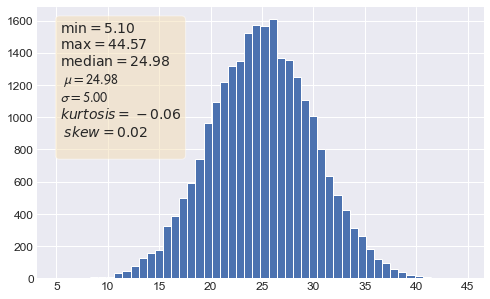

In [50]:
from scipy.stats import kurtosis, skew

np.random.seed(19681211)

fig, ax = plt.subplots(figsize=(8,5))
x = np.random.normal(25, 5, 25000)
mu = x.mean()
median = np.median(x)
sigma = x.std()
minimum = x.min()
maximum = x.max()
kurt = kurtosis(x)
skw = skew(x)

textstr = '$\mathrm{min}=%.2f$\n$\mathrm{max}=%.2f$\n$\mathrm{median}=%.2f$\n \
$\mathcal{\mu=%.2f}$\n$\mathcal{\sigma=%.2f}$\n$\mathit{kurtosis}=%.2f$\n \
$\mathit{skew}=%.2f$\n' % (minimum, maximum, median, mu, sigma, kurt, skw)

ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.show()

C:\Users\arono\anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\arono\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:761: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x000001546C6C3EF0> with the PlateCarree projection.
  warnings.warn('Approximating coordinate system {!r} with the '


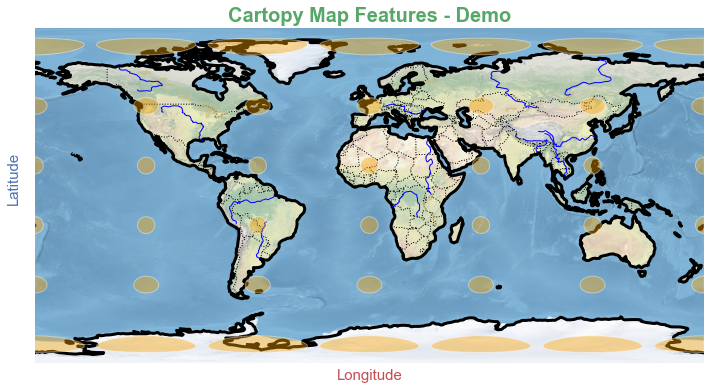

In [51]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_global()
ax.stock_img()

ax.add_feature(cfeature.LAND, color='wheat')
ax.add_feature(cfeature.OCEAN, color='skyblue')
ax.add_feature(cfeature.COASTLINE, linestyle='-',lw=3)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5, color='y')
ax.add_feature(cfeature.RIVERS, color='blue')
ax.tissot(facecolor='orange', alpha=0.4)            #Tissot's indicatrix in cartography

ax.set_title('Cartopy Map Features - Demo', size=20, weight='bold', color='g')

ax.text(0.5, -0.06, 'Longitude', va='bottom', ha='center', size=15, color='r',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(-0.02, 0.55, 'Latitude', va='bottom', ha='center', size=15, color='b',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)

plt.show()